# Bike-sharing case study

### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

### Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Reading, understanding & visualising the data

In [1]:
#Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

### Reading, understanding the data

In [2]:
# Reading the .csv file
bike_share = pd.read_csv('day.csv')

In [3]:
# Checking if there are null values in the data or not
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
# Checking mean, medians, min and max values of each columns
bike_share.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
# checking unneccessary columns to drop
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# Dropping instant and dteday columns as it was only counting column
bike_share = bike_share.drop('instant',axis=1)
bike_share = bike_share.drop('dteday',axis =1)

In [7]:
# Changing to categorical variable
# 1:spring, 2:summer, 3:fall, 4:winter
def season(x):
    if x == 1:
        x='spring'
    elif x == 2:
        x='summer'
    elif x == 3:
        x='fall'
    elif x == 4:
        x='winter'
    return x
bike_share['season'] = bike_share['season'].apply(season)

In [8]:
# Changing to categorical variable
# 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sept, 10:Oct, 11:Nov, 12:Dec, 
def mnth(x):
    if x == 1:
        x='Jan'
    elif x == 2:
        x='Feb'
    elif x == 3:
        x='Mar'
    elif x == 4:
        x='Apr'
    elif x == 5:
        x='May'
    elif x == 6:
        x='Jun'
    elif x == 7:
        x='Jul'
    elif x == 8:
        x='Aug'
    elif x == 9:
        x='Sept'
    elif x == 10:
        x='Oct'  
    elif x == 11:
        x='Nov'
    elif x == 12:
        x='Dec'   
    return x
bike_share['mnth'] = bike_share['mnth'].apply(mnth)

In [9]:
# Changing to categorical variable
# 0:Tue, 1:Wed, 2:Thu, 3:Fri, 4:Sat, 5:Sun, 6:Mon
def weekday(x):
    if x == 0:
        x='Tue'
    elif x == 1:
        x='Wed'    
    elif x == 2:
        x='Thu'
    elif x == 3:
        x='Fri'
    elif x == 4:
        x='Sat'
    elif x == 5:
        x='Sun'
    elif x == 6:
        x='Mon'    
    return x
bike_share['weekday'] = bike_share['weekday'].apply(weekday)

In [10]:
# Changing to categorical variable
#    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
def weathersit(x):
    if x == 1:
        x='Clear'
    elif x == 2:
        x='Mist + Cloudy'
    elif x == 3:
        x='Light Snow'
    elif x == 4:
        x='Heavy Rain'
    return x
bike_share['weathersit'] = bike_share['weathersit'].apply(weathersit)


In [11]:
# Getting rid of redundant columns to improve the model
bike_share = bike_share.drop(['atemp','casual','registered'],axis =1)

### Visualising the data

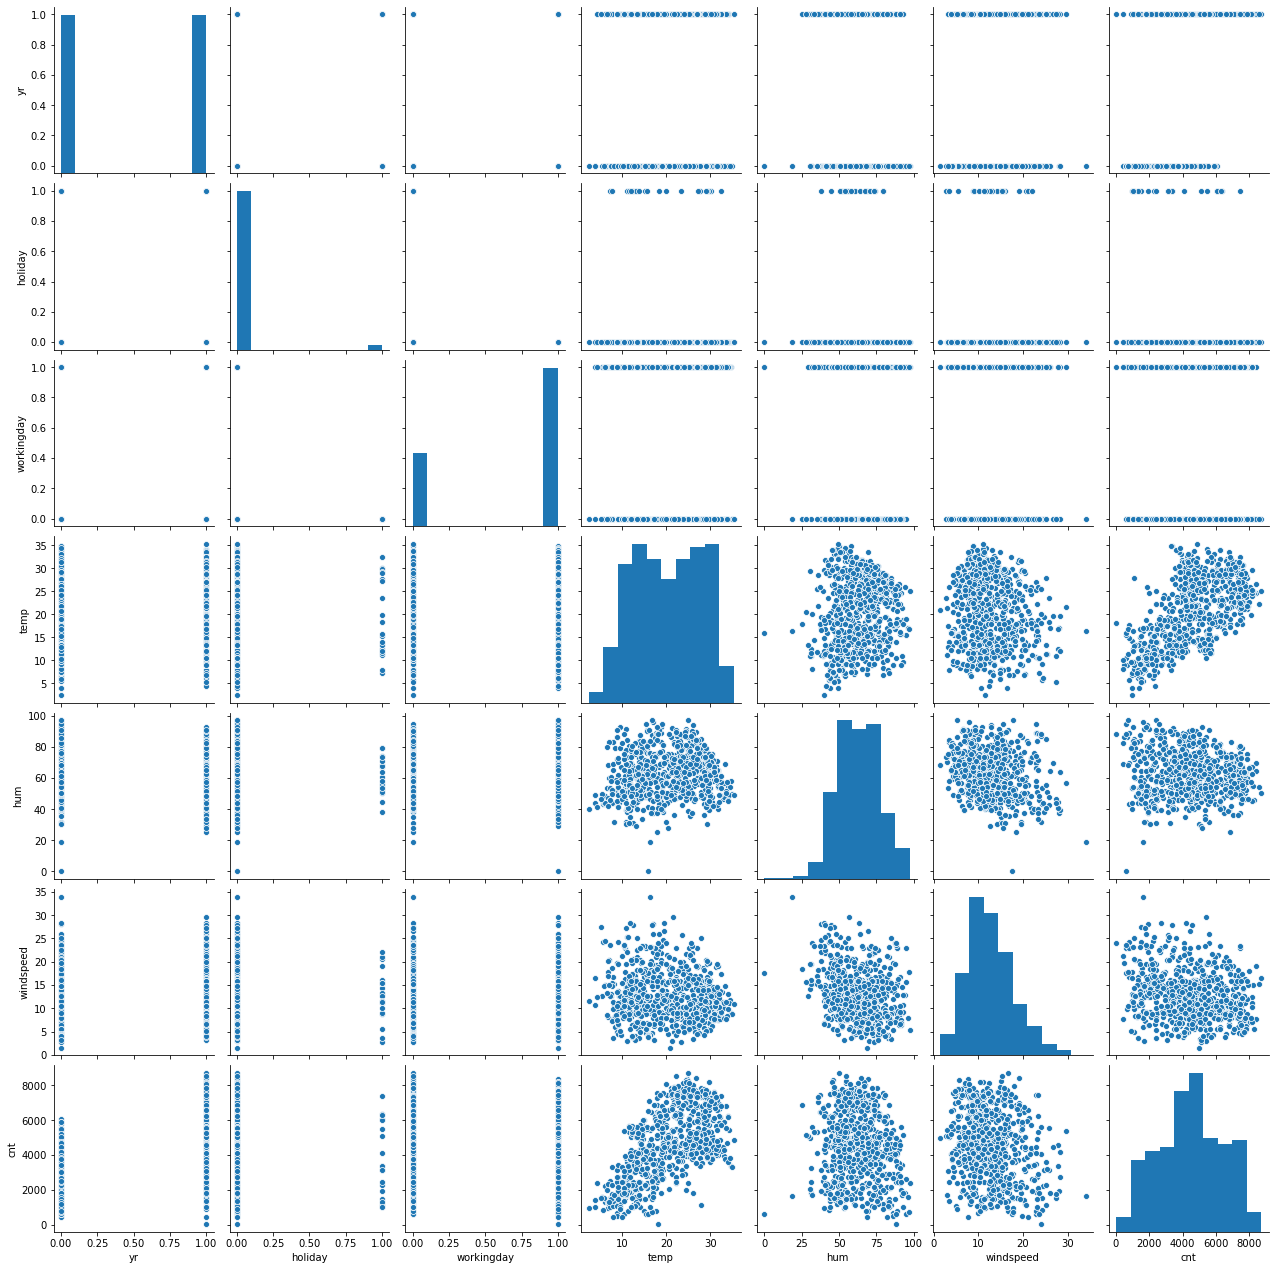

In [12]:
# This pairplot is to see relation between variables to get an idea of how data behaves(Mainly for numerical variables)
sns.pairplot(bike_share)
plt.show()

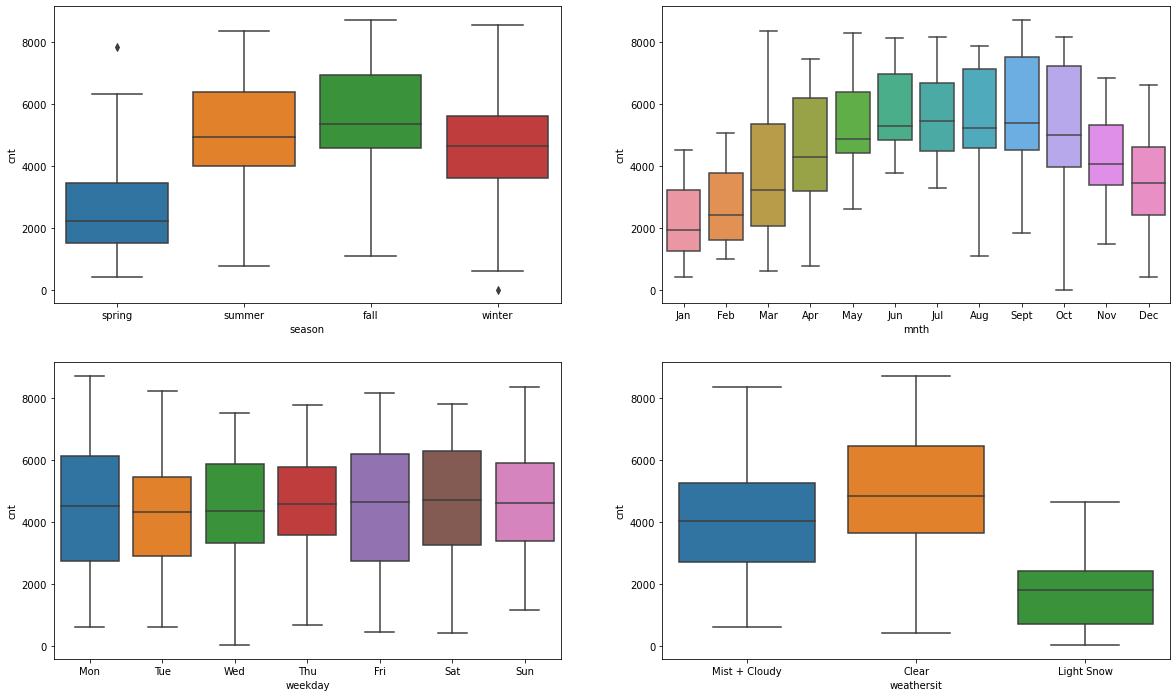

In [13]:
# This boxplots are for categorical variables and and used to observe the relation between variable and target variable cnt
plt.figure(figsize = (20,12))
plt.subplot(2,2,1)
sns.boxplot(x= 'season' , y='cnt',data=bike_share)
plt.subplot(2,2,2)
sns.boxplot(x= 'mnth' , y='cnt',data=bike_share)
plt.subplot(2,2,3)
sns.boxplot(x= 'weekday' , y='cnt',data=bike_share)
plt.subplot(2,2,4)
sns.boxplot(x= 'weathersit' , y='cnt',data=bike_share)
plt.show()

## Step 2: Preparing the data for modelling

In [14]:
# function to to change categorical variables to dummy variables
def categorical_to_dummy(columnName, bike_share):
    status = pd.get_dummies( bike_share[columnName], drop_first = True)
    bike_share = pd.concat( [bike_share,status], axis = 1)
    bike_share = bike_share.drop( columnName , axis=1)
    return bike_share


categorical_variables = ['season','mnth','weekday','weathersit']
for i in categorical_variables:
    bike_share = categorical_to_dummy(i,bike_share)

### train-test split

In [15]:
df_train, df_test = train_test_split(bike_share, train_size = 0.7, random_state=1)

### Rescaling using MinMax method

In [16]:
#Scaling (MinMax Method)
scaler  = MinMaxScaler()

In [17]:
num_vars = ['temp', 'hum', 'windspeed','cnt']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

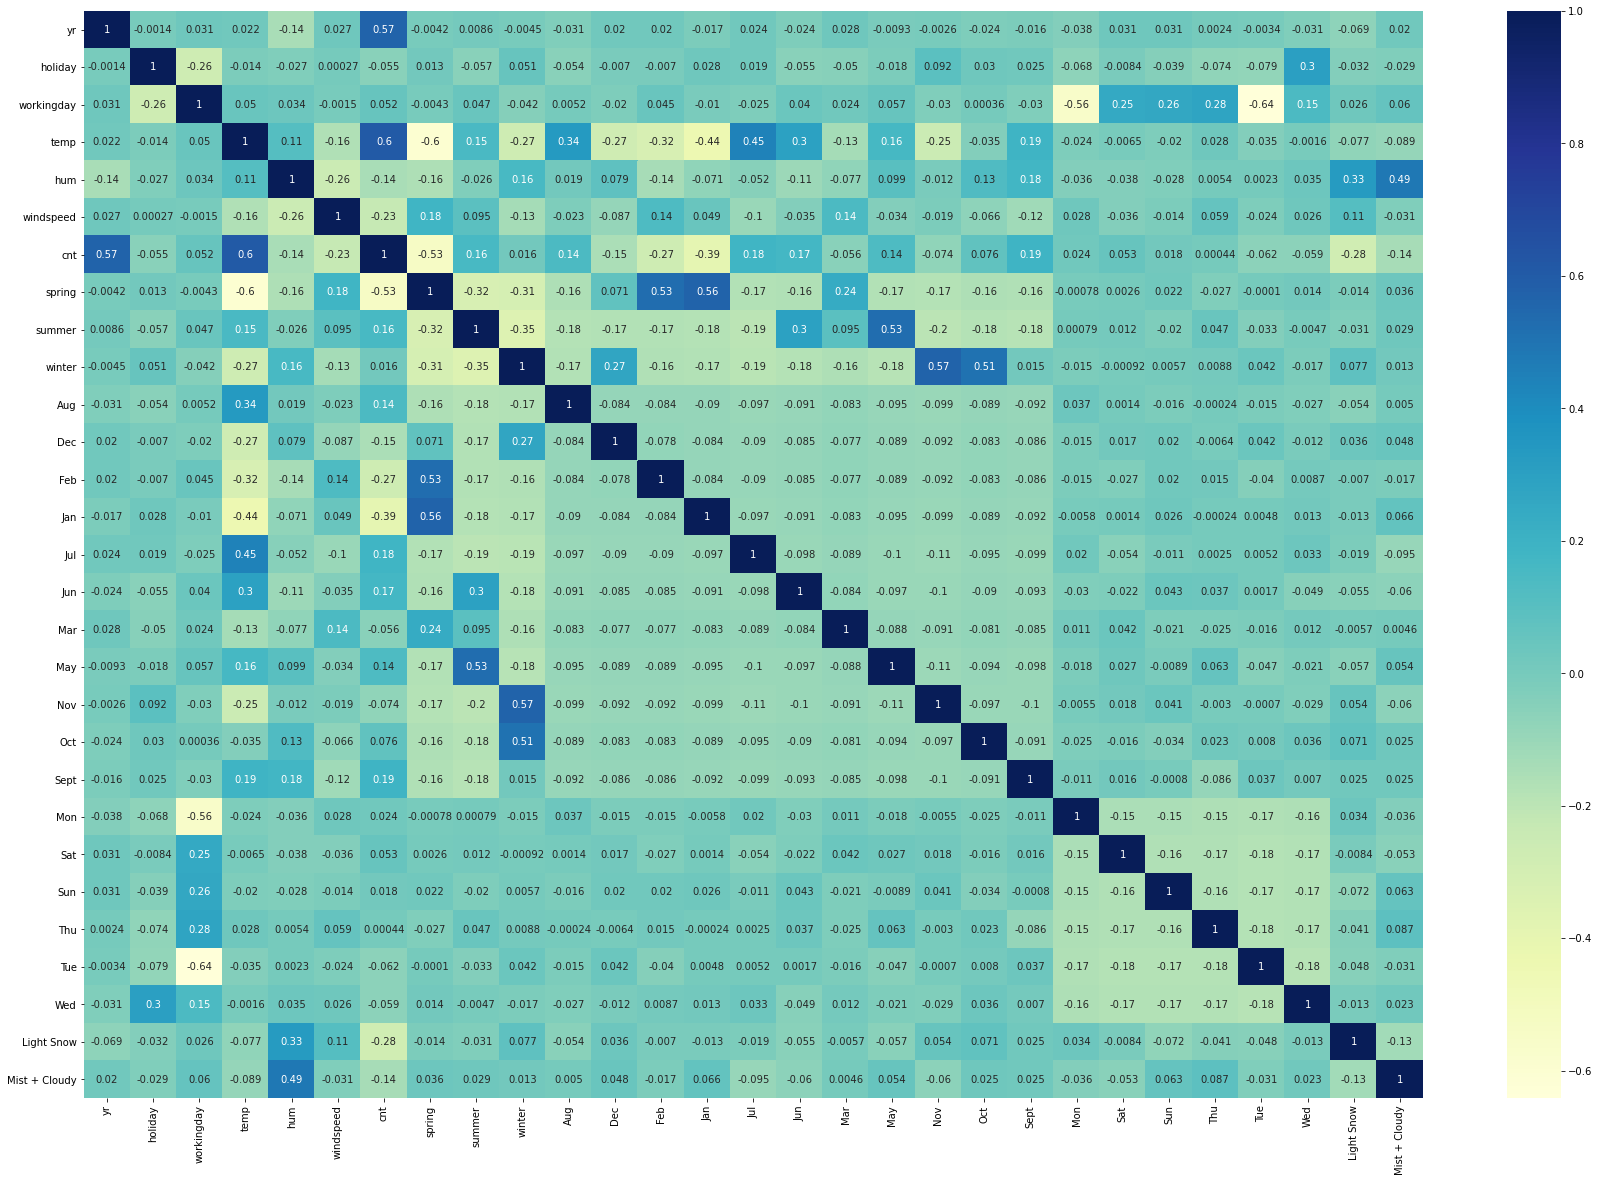

In [18]:
# heatmap
plt.figure(figsize=(30,20))
sns.heatmap(df_train.corr(),annot = True, cmap='YlGnBu')
plt.show()

In [19]:
#Seperating target variable 
y_train = df_train.pop('cnt')
x_train = df_train

## Step 3: Training the model 

In [20]:
# Backwards Method to create the model to summarize and drop unwanted variables
x_train_sm =  sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     92.11
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          2.84e-171
Time:                        22:58:36   Log-Likelihood:                 515.26
No. Observations:                 510   AIC:                            -974.5
Df Residuals:                     482   BIC:                            -856.0
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2379      0.036      6.621      0.000       0.167       0.308
yr                0.2346      0.008     28.308      0.000       0.218       0.251
holiday           0.0135      0.023      0.586      0.558      -0.032       0.059
workingday        0.0811      0.013      6.432      0.000       0.056       0.106
temp              0.4365      0.047      9.208      0.000       0.343       0.530
hum              -0.1485      0.032     -4.702      0.000      -0.211      -0.086
windspeed        -0.1591      0.024     -6.665      0.000      -0.206      -0.112
spring           -0.0754      0.031     -2.410      0.016      -0.137      -0.014
summer            0.0287      0.027      1.075      0.283      -0.024       0.081
winter            0.0653      0.027      2.424      0.016       0.012       0.118
Aug               0.0054      0.034      0.158      0.875      -0.062       0.073
Dec              -0.0266      0.036     -0.745      0.457      -0.097       0.044
Feb              -0.0181      0.035     -0.513      0.608      -0.088       0.051
Jan              -0.0399      0.036     -1.101      0.272      -0.111       0.031
Jul              -0.0283      0.035     -0.812      0.417      -0.097       0.040
Jun              -0.0002      0.024     -0.008      0.994      -0.048       0.047
Mar               0.0398      0.026      1.529      0.127      -0.011       0.091
May               0.0308      0.021      1.487      0.138      -0.010       0.071
Nov              -0.0213      0.038     -0.562      0.574      -0.096       0.053
Oct               0.0452      0.037      1.215      0.225      -0.028       0.118
Sept              0.0861      0.032      2.667      0.008       0.023       0.150
Mon               0.1052      0.014      7.629      0.000       0.078       0.132
Sat            9.285e-05      0.015      0.006      0.995      -0.030       0.030
Sun              -0.0070      0.016     -0.449      0.653      -0.037       0.024
Thu              -0.0151      0.015     -0.981      0.327      -0.045       0.015
Tue               0.0381      0.013      2.827      0.005       0.012       0.065
Wed              -0.0174      0.015     -1.126      0.261      -0.048       0.013
Light Snow       -0.2215      0.028     -7.838      0.000      -0.277      -0.166
Mist + Cloudy    -0.0349      0.011     -3.086      0.002      -0.057      -0.013
==============================================================================
Omnibus:                       95.564   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.962
Skew:                          -0.944   Prob(JB):                     7.81e-53
Kurtosis:                       5.780   Cond. No.                     1.10e+16
================================================================

In [21]:
# VIF(Variance Inflation Factor)
# Fuction to determine the vif of dataframe 
def vif(x_train):
    vif = pd.DataFrame()
    vif['features'] = x_train.columns
    vif['vif'] = [variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
    vif['vif'] = round(vif['vif'],2)
    vif = vif.sort_values(by = 'vif',ascending=False)
    return vif

In [22]:
vif(x_train)

,features,vif
2,workingday,87.71
24,Tue,19.96
20,Mon,15.46
6,spring,10.43
7,summer,8.61
8,winter,8.46
17,Nov,7.85
3,temp,7.16
13,Jul,6.44
18,Oct,6.35


In [23]:
# Priority to eliminate is
# 1. high P value and high VIF
# 2. high P value and low VIF
# 3. low P value and high VIF
# 4. low P value and low VIF

In [24]:
# according to priority order eliminate the variables 
x = x_train.drop('Sat',axis = 1)
x_train_sm =  sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     95.85
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          2.87e-172
Time:                        22:58:36   Log-Likelihood:                 515.26
No. Observations:                 510   AIC:                            -976.5
Df Residuals:                     483   BIC:                            -862.2
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2379      0.036      6.669      0.000       0.168       0.308
yr                0.2346      0.008     28.337      0.000       0.218       0.251
holiday           0.0135      0.022      0.603      0.547      -0.031       0.058
workingday        0.0811      0.012      6.958      0.000       0.058       0.104
temp              0.4365      0.047      9.218      0.000       0.343       0.530
hum              -0.1485      0.032     -4.708      0.000      -0.211      -0.087
windspeed        -0.1591      0.024     -6.672      0.000      -0.206      -0.112
spring           -0.0754      0.031     -2.413      0.016      -0.137      -0.014
summer            0.0287      0.027      1.076      0.283      -0.024       0.081
winter            0.0652      0.027      2.427      0.016       0.012       0.118
Aug               0.0054      0.034      0.158      0.875      -0.062       0.073
Dec              -0.0266      0.036     -0.746      0.456      -0.097       0.043
Feb              -0.0181      0.035     -0.513      0.608      -0.088       0.051
Jan              -0.0399      0.036     -1.102      0.271      -0.111       0.031
Jul              -0.0283      0.035     -0.814      0.416      -0.097       0.040
Jun              -0.0002      0.024     -0.008      0.994      -0.048       0.047
Mar               0.0398      0.026      1.531      0.126      -0.011       0.091
May               0.0308      0.021      1.488      0.137      -0.010       0.071
Nov              -0.0213      0.038     -0.563      0.574      -0.095       0.053
Oct               0.0452      0.037      1.217      0.224      -0.028       0.118
Sept              0.0861      0.032      2.670      0.008       0.023       0.150
Mon               0.1052      0.013      7.811      0.000       0.079       0.132
Sun              -0.0070      0.013     -0.524      0.601      -0.033       0.019
Thu              -0.0151      0.013     -1.140      0.255      -0.041       0.011
Tue               0.0381      0.013      2.901      0.004       0.012       0.064
Wed              -0.0174      0.013     -1.308      0.192      -0.044       0.009
Light Snow       -0.2215      0.028     -7.876      0.000      -0.277      -0.166
Mist + Cloudy    -0.0349      0.011     -3.090      0.002      -0.057      -0.013
==============================================================================
Omnibus:                       95.555   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.913
Skew:                          -0.943   Prob(JB):                     8.01e-53
Kurtosis:                       5.780   Cond. No.                     1.18e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of

In [25]:
vif(x)

,features,vif
2,workingday,84.49
23,Tue,19.95
20,Mon,15.45
6,spring,10.42
7,summer,8.61
8,winter,8.45
17,Nov,7.85
3,temp,7.16
13,Jul,6.43
18,Oct,6.35


In [26]:
x = x.drop('Jun',axis = 1)
x_train_sm =  sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     99.89
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          2.84e-173
Time:                        22:58:36   Log-Likelihood:                 515.26
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     484   BIC:                            -868.4
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2379      0.035      6.755      0.000       0.169       0.307
yr                0.2346      0.008     28.545      0.000       0.218       0.251
holiday           0.0135      0.022      0.604      0.546      -0.031       0.058
workingday        0.0811      0.012      7.022      0.000       0.058       0.104
temp              0.4363      0.042     10.386      0.000       0.354       0.519
hum              -0.1485      0.031     -4.761      0.000      -0.210      -0.087
windspeed        -0.1590      0.024     -6.745      0.000      -0.205      -0.113
spring           -0.0754      0.031     -2.432      0.015      -0.136      -0.014
summer            0.0287      0.026      1.113      0.266      -0.022       0.079
winter            0.0653      0.027      2.438      0.015       0.013       0.118
Aug               0.0056      0.027      0.208      0.835      -0.047       0.058
Dec              -0.0265      0.035     -0.766      0.444      -0.095       0.042
Feb              -0.0181      0.035     -0.521      0.603      -0.086       0.050
Jan              -0.0398      0.036     -1.112      0.267      -0.110       0.031
Jul              -0.0282      0.026     -1.065      0.287      -0.080       0.024
Mar               0.0399      0.025      1.618      0.106      -0.009       0.088
May               0.0309      0.017      1.793      0.074      -0.003       0.065
Nov              -0.0212      0.036     -0.581      0.561      -0.093       0.050
Oct               0.0453      0.035      1.300      0.194      -0.023       0.114
Sept              0.0863      0.027      3.215      0.001       0.034       0.139
Mon               0.1052      0.013      7.876      0.000       0.079       0.131
Sun              -0.0070      0.013     -0.526      0.599      -0.033       0.019
Thu              -0.0151      0.013     -1.142      0.254      -0.041       0.011
Tue               0.0381      0.013      2.937      0.003       0.013       0.064
Wed              -0.0174      0.013     -1.309      0.191      -0.044       0.009
Light Snow       -0.2216      0.028     -7.900      0.000      -0.277      -0.166
Mist + Cloudy    -0.0349      0.011     -3.103      0.002      -0.057      -0.013
==============================================================================
Omnibus:                       95.587   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.059
Skew:                          -0.944   Prob(JB):                     7.45e-53
Kurtosis:                       5.781   Cond. No.                     1.19e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.09e-29. This 

In [27]:
vif(x)

,features,vif
2,workingday,82.41
22,Tue,19.39
19,Mon,15.05
6,spring,10.27
8,winter,8.40
7,summer,8.08
16,Nov,7.32
12,Jan,6.04
3,temp,5.65
17,Oct,5.59


In [28]:
x = x.drop('Aug',axis = 1)
x_train_sm =  sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     104.3
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          2.81e-174
Time:                        22:58:36   Log-Likelihood:                 515.24
No. Observations:                 510   AIC:                            -980.5
Df Residuals:                     485   BIC:                            -874.6
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2411      0.032      7.627      0.000       0.179       0.303
yr                0.2346      0.008     28.575      0.000       0.218       0.251
holiday           0.0143      0.022      0.650      0.516      -0.029       0.058
workingday        0.0819      0.011      7.513      0.000       0.060       0.103
temp              0.4361      0.042     10.394      0.000       0.354       0.519
hum              -0.1480      0.031     -4.762      0.000      -0.209      -0.087
windspeed        -0.1590      0.024     -6.750      0.000      -0.205      -0.113
spring           -0.0781      0.028     -2.774      0.006      -0.133      -0.023
summer            0.0248      0.018      1.416      0.157      -0.010       0.059
winter            0.0639      0.026      2.461      0.014       0.013       0.115
Dec              -0.0289      0.033     -0.888      0.375      -0.093       0.035
Feb              -0.0195      0.034     -0.575      0.566      -0.086       0.047
Jan              -0.0413      0.035     -1.178      0.239      -0.110       0.028
Jul              -0.0322      0.018     -1.797      0.073      -0.067       0.003
Mar               0.0390      0.024      1.608      0.108      -0.009       0.087
May               0.0307      0.017      1.786      0.075      -0.003       0.064
Nov              -0.0240      0.034     -0.711      0.477      -0.090       0.042
Oct               0.0425      0.032      1.326      0.185      -0.020       0.105
Sept              0.0825      0.020      4.182      0.000       0.044       0.121
Mon               0.1060      0.013      8.344      0.000       0.081       0.131
Sun              -0.0071      0.013     -0.529      0.597      -0.033       0.019
Thu              -0.0152      0.013     -1.147      0.252      -0.041       0.011
Tue               0.0389      0.012      3.135      0.002       0.015       0.063
Wed              -0.0174      0.013     -1.310      0.191      -0.044       0.009
Light Snow       -0.2217      0.028     -7.918      0.000      -0.277      -0.167
Mist + Cloudy    -0.0349      0.011     -3.107      0.002      -0.057      -0.013
==============================================================================
Omnibus:                       95.941   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.978
Skew:                          -0.947   Prob(JB):                     4.70e-53
Kurtosis:                       5.784   Cond. No.                     1.54e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.47e-30. This might indicate that there are
strong multicollinearity problems or that the design

In [29]:
vif(x)

,features,vif
2,workingday,66.66
21,Tue,15.69
18,Mon,12.07
6,spring,8.49
8,winter,7.93
15,Nov,6.30
11,Jan,5.80
3,temp,5.65
10,Feb,4.85
16,Oct,4.74


In [30]:
x = x.drop('Feb',axis = 1)
x_train_sm =  sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     108.9
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          3.14e-175
Time:                        22:58:37   Log-Likelihood:                 515.07
No. Observations:                 510   AIC:                            -982.1
Df Residuals:                     486   BIC:                            -880.5
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2339      0.029      8.061      0.000       0.177       0.291
yr                0.2342      0.008     28.639      0.000       0.218       0.250
holiday           0.0119      0.022      0.551      0.582      -0.031       0.054
workingday        0.0798      0.010      7.758      0.000       0.060       0.100
temp              0.4466      0.038     11.829      0.000       0.372       0.521
hum              -0.1490      0.031     -4.804      0.000      -0.210      -0.088
windspeed        -0.1586      0.024     -6.740      0.000      -0.205      -0.112
spring           -0.0877      0.023     -3.867      0.000      -0.132      -0.043
summer            0.0264      0.017      1.528      0.127      -0.008       0.060
winter            0.0592      0.025      2.405      0.017       0.011       0.108
Dec              -0.0167      0.025     -0.677      0.499      -0.065       0.032
Jan              -0.0248      0.020     -1.236      0.217      -0.064       0.015
Jul              -0.0319      0.018     -1.780      0.076      -0.067       0.003
Mar               0.0485      0.018      2.746      0.006       0.014       0.083
May               0.0315      0.017      1.844      0.066      -0.002       0.065
Nov              -0.0138      0.029     -0.481      0.631      -0.070       0.043
Oct               0.0512      0.028      1.815      0.070      -0.004       0.107
Sept              0.0860      0.019      4.586      0.000       0.049       0.123
Mon               0.1046      0.012      8.389      0.000       0.080       0.129
Sun              -0.0072      0.013     -0.543      0.587      -0.033       0.019
Thu              -0.0155      0.013     -1.174      0.241      -0.042       0.010
Tue               0.0375      0.012      3.084      0.002       0.014       0.061
Wed              -0.0175      0.013     -1.312      0.190      -0.044       0.009
Light Snow       -0.2216      0.028     -7.920      0.000      -0.277      -0.167
Mist + Cloudy    -0.0345      0.011     -3.077      0.002      -0.056      -0.012
==============================================================================
Omnibus:                       94.331   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.551
Skew:                          -0.937   Prob(JB):                     1.93e-51
Kurtosis:                       5.735   Cond. No.                     1.33e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.66e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [31]:
vif(x)

,features,vif
2,workingday,55.67
20,Tue,13.46
17,Mon,10.34
8,winter,7.12
6,spring,5.51
3,temp,4.58
14,Nov,4.55
1,holiday,3.87
15,Oct,3.67
7,summer,3.63


In [32]:
x = x.drop('holiday',axis = 1)
x_train_sm =  sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     108.9
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          3.14e-175
Time:                        22:58:37   Log-Likelihood:                 515.07
No. Observations:                 510   AIC:                            -982.1
Df Residuals:                     486   BIC:                            -880.5
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2459      0.044      5.537      0.000       0.159       0.333
yr                0.2342      0.008     28.639      0.000       0.218       0.250
workingday        0.0679      0.024      2.775      0.006       0.020       0.116
temp              0.4466      0.038     11.829      0.000       0.372       0.521
hum              -0.1490      0.031     -4.804      0.000      -0.210      -0.088
windspeed        -0.1586      0.024     -6.740      0.000      -0.205      -0.112
spring           -0.0877      0.023     -3.867      0.000      -0.132      -0.043
summer            0.0264      0.017      1.528      0.127      -0.008       0.060
winter            0.0592      0.025      2.405      0.017       0.011       0.108
Dec              -0.0167      0.025     -0.677      0.499      -0.065       0.032
Jan              -0.0248      0.020     -1.236      0.217      -0.064       0.015
Jul              -0.0319      0.018     -1.780      0.076      -0.067       0.003
Mar               0.0485      0.018      2.746      0.006       0.014       0.083
May               0.0315      0.017      1.844      0.066      -0.002       0.065
Nov              -0.0138      0.029     -0.481      0.631      -0.070       0.043
Oct               0.0512      0.028      1.815      0.070      -0.004       0.107
Sept              0.0860      0.019      4.586      0.000       0.049       0.123
Mon               0.0927      0.028      3.353      0.001       0.038       0.147
Sun              -0.0072      0.013     -0.543      0.587      -0.033       0.019
Thu              -0.0155      0.013     -1.174      0.241      -0.042       0.010
Tue               0.0256      0.027      0.945      0.345      -0.028       0.079
Wed              -0.0175      0.013     -1.312      0.190      -0.044       0.009
Light Snow       -0.2216      0.028     -7.920      0.000      -0.277      -0.167
Mist + Cloudy    -0.0345      0.011     -3.077      0.002      -0.056      -0.012
==============================================================================
Omnibus:                       94.331   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.551
Skew:                          -0.937   Prob(JB):                     1.93e-51
Kurtosis:                       5.735   Cond. No.                         27.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
vif(x)

,features,vif
2,temp,19.06
3,hum,18.14
1,workingday,16.87
7,winter,9.12
4,windspeed,6.17
19,Tue,4.99
5,spring,4.76
13,Nov,4.51
16,Mon,4.00
14,Oct,3.87


In [34]:
x = x.drop('Nov',axis = 1)
x_train_sm =  sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     114.0
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          3.25e-176
Time:                        22:58:37   Log-Likelihood:                 514.94
No. Observations:                 510   AIC:                            -983.9
Df Residuals:                     487   BIC:                            -886.5
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2389      0.042      5.699      0.000       0.157       0.321
yr                0.2342      0.008     28.658      0.000       0.218       0.250
workingday        0.0694      0.024      2.863      0.004       0.022       0.117
temp              0.4520      0.036     12.550      0.000       0.381       0.523
hum              -0.1498      0.031     -4.839      0.000      -0.211      -0.089
windspeed        -0.1584      0.024     -6.738      0.000      -0.205      -0.112
spring           -0.0856      0.022     -3.848      0.000      -0.129      -0.042
summer            0.0287      0.017      1.727      0.085      -0.004       0.061
winter            0.0518      0.019      2.688      0.007       0.014       0.090
Dec              -0.0085      0.018     -0.477      0.634      -0.044       0.027
Jan              -0.0224      0.019     -1.155      0.249      -0.061       0.016
Jul              -0.0309      0.018     -1.737      0.083      -0.066       0.004
Mar               0.0495      0.018      2.824      0.005       0.015       0.084
May               0.0313      0.017      1.832      0.068      -0.002       0.065
Oct               0.0614      0.018      3.327      0.001       0.025       0.098
Sept              0.0900      0.017      5.371      0.000       0.057       0.123
Mon               0.0945      0.027      3.454      0.001       0.041       0.148
Sun              -0.0075      0.013     -0.560      0.576      -0.034       0.019
Thu              -0.0155      0.013     -1.170      0.242      -0.041       0.010
Tue               0.0272      0.027      1.015      0.311      -0.025       0.080
Wed              -0.0173      0.013     -1.303      0.193      -0.043       0.009
Light Snow       -0.2221      0.028     -7.945      0.000      -0.277      -0.167
Mist + Cloudy    -0.0340      0.011     -3.051      0.002      -0.056      -0.012
==============================================================================
Omnibus:                       94.705   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.788
Skew:                          -0.942   Prob(JB):                     1.71e-51
Kurtosis:                       5.730   Cond. No.                         25.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
vif(x)

,features,vif
2,temp,18.80
3,hum,17.84
1,workingday,16.76
4,windspeed,6.12
18,Tue,4.96
5,spring,4.76
7,winter,4.09
15,Mon,3.98
6,summer,3.76
21,Mist + Cloudy,2.52


In [36]:
x = x.drop('Sun',axis = 1)
x_train_sm =  sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     119.6
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          3.43e-177
Time:                        22:58:37   Log-Likelihood:                 514.78
No. Observations:                 510   AIC:                            -985.6
Df Residuals:                     488   BIC:                            -892.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2366      0.042      5.675      0.000       0.155       0.319
yr                0.2342      0.008     28.681      0.000       0.218       0.250
workingday        0.0692      0.024      2.855      0.004       0.022       0.117
temp              0.4521      0.036     12.563      0.000       0.381       0.523
hum              -0.1494      0.031     -4.831      0.000      -0.210      -0.089
windspeed        -0.1587      0.023     -6.760      0.000      -0.205      -0.113
spring           -0.0856      0.022     -3.852      0.000      -0.129      -0.042
summer            0.0286      0.017      1.726      0.085      -0.004       0.061
winter            0.0516      0.019      2.679      0.008       0.014       0.089
Dec              -0.0086      0.018     -0.484      0.629      -0.044       0.026
Jan              -0.0226      0.019     -1.163      0.245      -0.061       0.016
Jul              -0.0311      0.018     -1.752      0.080      -0.066       0.004
Mar               0.0498      0.018      2.846      0.005       0.015       0.084
May               0.0314      0.017      1.842      0.066      -0.002       0.065
Oct               0.0617      0.018      3.344      0.001       0.025       0.098
Sept              0.0901      0.017      5.379      0.000       0.057       0.123
Mon               0.0968      0.027      3.576      0.000       0.044       0.150
Thu              -0.0129      0.012     -1.042      0.298      -0.037       0.011
Tue               0.0295      0.026      1.113      0.266      -0.023       0.082
Wed              -0.0149      0.013     -1.185      0.237      -0.040       0.010
Light Snow       -0.2208      0.028     -7.931      0.000      -0.276      -0.166
Mist + Cloudy    -0.0345      0.011     -3.104      0.002      -0.056      -0.013
==============================================================================
Omnibus:                       95.858   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.414
Skew:                          -0.951   Prob(JB):                     2.79e-52
Kurtosis:                       5.748   Cond. No.                         25.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
vif(x)

,features,vif
2,temp,18.72
3,hum,17.84
1,workingday,16.62
4,windspeed,6.10
17,Tue,4.89
5,spring,4.74
7,winter,4.05
15,Mon,3.93
6,summer,3.75
20,Mist + Cloudy,2.51


In [38]:
x = x.drop('Dec',axis = 1)
x_train_sm =  sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     125.8
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          3.39e-178
Time:                        22:58:37   Log-Likelihood:                 514.66
No. Observations:                 510   AIC:                            -987.3
Df Residuals:                     489   BIC:                            -898.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2347      0.041      5.659      0.000       0.153       0.316
yr                0.2340      0.008     28.708      0.000       0.218       0.250
workingday        0.0689      0.024      2.849      0.005       0.021       0.116
temp              0.4550      0.035     12.820      0.000       0.385       0.525
hum              -0.1507      0.031     -4.895      0.000      -0.211      -0.090
windspeed        -0.1578      0.023     -6.749      0.000      -0.204      -0.112
spring           -0.0861      0.022     -3.876      0.000      -0.130      -0.042
summer            0.0292      0.017      1.768      0.078      -0.003       0.062
winter            0.0504      0.019      2.642      0.009       0.013       0.088
Jan              -0.0204      0.019     -1.081      0.280      -0.057       0.017
Jul              -0.0310      0.018     -1.747      0.081      -0.066       0.004
Mar               0.0509      0.017      2.937      0.003       0.017       0.085
May               0.0316      0.017      1.852      0.065      -0.002       0.065
Oct               0.0640      0.018      3.603      0.000       0.029       0.099
Sept              0.0912      0.017      5.501      0.000       0.059       0.124
Mon               0.0966      0.027      3.573      0.000       0.043       0.150
Thu              -0.0130      0.012     -1.047      0.296      -0.037       0.011
Tue               0.0291      0.026      1.101      0.272      -0.023       0.081
Wed              -0.0149      0.013     -1.193      0.233      -0.040       0.010
Light Snow       -0.2207      0.028     -7.932      0.000      -0.275      -0.166
Mist + Cloudy    -0.0345      0.011     -3.101      0.002      -0.056      -0.013
==============================================================================
Omnibus:                       94.923   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.810
Skew:                          -0.946   Prob(JB):                     2.79e-51
Kurtosis:                       5.716   Cond. No.                         25.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
vif(x)

,features,vif
2,temp,18.40
3,hum,17.61
1,workingday,16.48
4,windspeed,6.08
16,Tue,4.84
5,spring,4.69
14,Mon,3.91
7,winter,3.86
6,summer,3.74
19,Mist + Cloudy,2.51


In [40]:
x = x.drop('Thu',axis = 1)
x_train_sm =  sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     132.3
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          5.00e-179
Time:                        22:58:37   Log-Likelihood:                 514.09
No. Observations:                 510   AIC:                            -988.2
Df Residuals:                     490   BIC:                            -903.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2338      0.041      5.640      0.000       0.152       0.315
yr                0.2342      0.008     28.741      0.000       0.218       0.250
workingday        0.0680      0.024      2.813      0.005       0.020       0.116
temp              0.4541      0.035     12.799      0.000       0.384       0.524
hum              -0.1507      0.031     -4.894      0.000      -0.211      -0.090
windspeed        -0.1598      0.023     -6.859      0.000      -0.206      -0.114
spring           -0.0860      0.022     -3.874      0.000      -0.130      -0.042
summer            0.0290      0.017      1.755      0.080      -0.003       0.061
winter            0.0499      0.019      2.616      0.009       0.012       0.087
Jan              -0.0208      0.019     -1.102      0.271      -0.058       0.016
Jul              -0.0314      0.018     -1.769      0.078      -0.066       0.003
Mar               0.0513      0.017      2.961      0.003       0.017       0.085
May               0.0312      0.017      1.830      0.068      -0.002       0.065
Oct               0.0638      0.018      3.588      0.000       0.029       0.099
Sept              0.0923      0.017      5.575      0.000       0.060       0.125
Mon               0.0990      0.027      3.673      0.000       0.046       0.152
Tue               0.0315      0.026      1.193      0.233      -0.020       0.083
Wed              -0.0117      0.012     -0.966      0.334      -0.036       0.012
Light Snow       -0.2194      0.028     -7.893      0.000      -0.274      -0.165
Mist + Cloudy    -0.0352      0.011     -3.173      0.002      -0.057      -0.013
==============================================================================
Omnibus:                       96.500   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.747
Skew:                          -0.956   Prob(JB):                     8.70e-53
Kurtosis:                       5.761   Cond. No.                         25.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
vif(x)

,features,vif
2,temp,18.37
3,hum,17.61
1,workingday,16.42
4,windspeed,6.02
15,Tue,4.80
5,spring,4.69
14,Mon,3.88
7,winter,3.86
6,summer,3.74
18,Mist + Cloudy,2.50


In [42]:
x = x.drop('Jan',axis = 1)
x_train_sm =  sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     139.6
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          7.62e-180
Time:                        22:58:38   Log-Likelihood:                 513.46
No. Observations:                 510   AIC:                            -988.9
Df Residuals:                     491   BIC:                            -908.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2266      0.041      5.534      0.000       0.146       0.307
yr                0.2342      0.008     28.734      0.000       0.218       0.250
workingday        0.0685      0.024      2.832      0.005       0.021       0.116
temp              0.4625      0.035     13.347      0.000       0.394       0.531
hum              -0.1515      0.031     -4.920      0.000      -0.212      -0.091
windspeed        -0.1584      0.023     -6.806      0.000      -0.204      -0.113
spring           -0.0910      0.022     -4.181      0.000      -0.134      -0.048
summer            0.0296      0.017      1.789      0.074      -0.003       0.062
winter            0.0530      0.019      2.806      0.005       0.016       0.090
Jul              -0.0322      0.018     -1.815      0.070      -0.067       0.003
Mar               0.0565      0.017      3.383      0.001       0.024       0.089
May               0.0316      0.017      1.852      0.065      -0.002       0.065
Oct               0.0628      0.018      3.539      0.000       0.028       0.098
Sept              0.0923      0.017      5.573      0.000       0.060       0.125
Mon               0.0997      0.027      3.699      0.000       0.047       0.153
Tue               0.0320      0.026      1.216      0.225      -0.020       0.084
Wed              -0.0117      0.012     -0.959      0.338      -0.036       0.012
Light Snow       -0.2186      0.028     -7.866      0.000      -0.273      -0.164
Mist + Cloudy    -0.0354      0.011     -3.188      0.002      -0.057      -0.014
==============================================================================
Omnibus:                       95.726   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.103
Skew:                          -0.955   Prob(JB):                     1.46e-51
Kurtosis:                       5.715   Cond. No.                         25.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
vif(x)

,features,vif
2,temp,17.94
3,hum,17.54
1,workingday,16.28
4,windspeed,6.02
14,Tue,4.77
5,spring,4.10
13,Mon,3.85
7,winter,3.84
6,summer,3.74
17,Mist + Cloudy,2.50


In [44]:
x = x.drop('Tue',axis = 1)
x_train_sm =  sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     147.5
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          1.29e-180
Time:                        22:58:38   Log-Likelihood:                 512.69
No. Observations:                 510   AIC:                            -989.4
Df Residuals:                     492   BIC:                            -913.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2548      0.034      7.545      0.000       0.188       0.321
yr                0.2342      0.008     28.713      0.000       0.218       0.250
workingday        0.0420      0.010      4.016      0.000       0.021       0.063
temp              0.4607      0.035     13.299      0.000       0.393       0.529
hum              -0.1497      0.031     -4.865      0.000      -0.210      -0.089
windspeed        -0.1583      0.023     -6.800      0.000      -0.204      -0.113
spring           -0.0921      0.022     -4.235      0.000      -0.135      -0.049
summer            0.0296      0.017      1.790      0.074      -0.003       0.062
winter            0.0518      0.019      2.745      0.006       0.015       0.089
Jul              -0.0321      0.018     -1.812      0.071      -0.067       0.003
Mar               0.0573      0.017      3.432      0.001       0.024       0.090
May               0.0309      0.017      1.815      0.070      -0.003       0.064
Oct               0.0631      0.018      3.553      0.000       0.028       0.098
Sept              0.0920      0.017      5.557      0.000       0.059       0.125
Mon               0.0722      0.015      4.928      0.000       0.043       0.101
Wed              -0.0168      0.011     -1.475      0.141      -0.039       0.006
Light Snow       -0.2192      0.028     -7.885      0.000      -0.274      -0.165
Mist + Cloudy    -0.0355      0.011     -3.203      0.001      -0.057      -0.014
==============================================================================
Omnibus:                       98.778   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.735
Skew:                          -0.982   Prob(JB):                     1.95e-53
Kurtosis:                       5.751   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
vif(x)

,features,vif
3,hum,16.53
2,temp,14.38
4,windspeed,5.70
1,workingday,4.43
6,summer,3.35
7,winter,3.25
5,spring,3.22
16,Mist + Cloudy,2.49
0,yr,2.06
8,Jul,1.83


In [46]:
x = x.drop('Wed',axis = 1)
x_train_sm =  sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     156.2
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          2.98e-181
Time:                        22:58:38   Log-Likelihood:                 511.56
No. Observations:                 510   AIC:                            -989.1
Df Residuals:                     493   BIC:                            -917.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2533      0.034      7.494      0.000       0.187       0.320
yr                0.2345      0.008     28.737      0.000       0.219       0.251
workingday        0.0408      0.010      3.910      0.000       0.020       0.061
temp              0.4627      0.035     13.352      0.000       0.395       0.531
hum              -0.1521      0.031     -4.945      0.000      -0.213      -0.092
windspeed        -0.1599      0.023     -6.867      0.000      -0.206      -0.114
spring           -0.0918      0.022     -4.217      0.000      -0.135      -0.049
summer            0.0293      0.017      1.772      0.077      -0.003       0.062
winter            0.0526      0.019      2.787      0.006       0.016       0.090
Jul              -0.0336      0.018     -1.898      0.058      -0.068       0.001
Mar               0.0572      0.017      3.420      0.001       0.024       0.090
May               0.0316      0.017      1.851      0.065      -0.002       0.065
Oct               0.0616      0.018      3.472      0.001       0.027       0.097
Sept              0.0914      0.017      5.515      0.000       0.059       0.124
Mon               0.0742      0.015      5.082      0.000       0.045       0.103
Light Snow       -0.2173      0.028     -7.815      0.000      -0.272      -0.163
Mist + Cloudy    -0.0352      0.011     -3.166      0.002      -0.057      -0.013
==============================================================================
Omnibus:                       97.423   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.597
Skew:                          -0.973   Prob(JB):                     4.20e-52
Kurtosis:                       5.710   Cond. No.                         22.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
vif(x)

,features,vif
3,hum,16.45
2,temp,14.37
4,windspeed,5.68
1,workingday,4.40
6,summer,3.35
7,winter,3.25
5,spring,3.22
15,Mist + Cloudy,2.48
0,yr,2.06
8,Jul,1.82


In [48]:
x = x.drop('summer',axis = 1)
x_train_sm =  sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     165.7
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          1.08e-181
Time:                        22:58:38   Log-Likelihood:                 509.95
No. Observations:                 510   AIC:                            -987.9
Df Residuals:                     494   BIC:                            -920.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2840      0.029      9.761      0.000       0.227       0.341
yr                0.2349      0.008     28.731      0.000       0.219       0.251
workingday        0.0406      0.010      3.883      0.000       0.020       0.061
temp              0.4391      0.032     13.693      0.000       0.376       0.502
hum              -0.1507      0.031     -4.890      0.000      -0.211      -0.090
windspeed        -0.1572      0.023     -6.752      0.000      -0.203      -0.111
spring           -0.1180      0.016     -7.359      0.000      -0.149      -0.086
winter            0.0318      0.015      2.147      0.032       0.003       0.061
Jul              -0.0451      0.017     -2.725      0.007      -0.078      -0.013
Mar               0.0630      0.016      3.832      0.000       0.031       0.095
May               0.0447      0.015      2.898      0.004       0.014       0.075
Oct               0.0630      0.018      3.542      0.000       0.028       0.098
Sept              0.0814      0.016      5.212      0.000       0.051       0.112
Mon               0.0735      0.015      5.029      0.000       0.045       0.102
Light Snow       -0.2185      0.028     -7.845      0.000      -0.273      -0.164
Mist + Cloudy    -0.0356      0.011     -3.201      0.001      -0.057      -0.014
==============================================================================
Omnibus:                       98.799   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.228
Skew:                          -0.974   Prob(JB):                     1.25e-54
Kurtosis:                       5.808   Cond. No.                         18.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
vif(x)

,features,vif
3,hum,15.43
2,temp,14.34
4,windspeed,5.07
1,workingday,4.33
6,winter,2.60
14,Mist + Cloudy,2.46
5,spring,2.35
0,yr,2.03
7,Jul,1.59
12,Mon,1.58


### Until this point we dropped variables with p-value greater than 0.05 and now we drop variables with high VIF value i.e higher than 10 and inpect vaues between 5 to 10

In [50]:
#eliminating high VIF value columns
x = x.drop('hum',axis = 1)
x_train_sm =  sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     168.1
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          9.02e-178
Time:                        22:58:38   Log-Likelihood:                 497.89
No. Observations:                 510   AIC:                            -965.8
Df Residuals:                     495   BIC:                            -902.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2250      0.027      8.308      0.000       0.172       0.278
yr                0.2418      0.008     29.349      0.000       0.226       0.258
workingday        0.0429      0.011      4.014      0.000       0.022       0.064
temp              0.4038      0.032     12.634      0.000       0.341       0.467
windspeed        -0.1226      0.023     -5.403      0.000      -0.167      -0.078
spring           -0.1260      0.016     -7.721      0.000      -0.158      -0.094
winter            0.0188      0.015      1.261      0.208      -0.010       0.048
Jul              -0.0393      0.017     -2.330      0.020      -0.072      -0.006
Mar               0.0615      0.017      3.663      0.000       0.029       0.095
May               0.0343      0.016      2.197      0.029       0.004       0.065
Oct               0.0617      0.018      3.392      0.001       0.026       0.097
Sept              0.0718      0.016      4.529      0.000       0.041       0.103
Mon               0.0767      0.015      5.131      0.000       0.047       0.106
Light Snow       -0.2903      0.024    -11.983      0.000      -0.338      -0.243
Mist + Cloudy    -0.0693      0.009     -7.756      0.000      -0.087      -0.052
==============================================================================
Omnibus:                       91.338   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.881
Skew:                          -0.906   Prob(JB):                     3.28e-50
Kurtosis:                       5.728   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### After dropping 'hum' with vif = 15.43, R squared value change from 0.834 to 0.826 and this difference is not that big so dropping 'hum' variable will improve the model

In [51]:
vif(x)

,features,vif
2,temp,7.56
3,windspeed,4.98
1,workingday,4.31
0,yr,2.01
5,winter,2.00
4,spring,1.86
11,Mon,1.58
6,Jul,1.57
9,Oct,1.54
13,Mist + Cloudy,1.50


### After dropping 'temp' with vif =7.56,  R squared value change from 0.826 to 0.770 and this difference is very high that is dropping 'temp' variable will not be good for the model

## Step 4: Residual Analysis and Predictions

In [52]:
y_train_pred = lr_model.predict(x_train_sm)
y_train_pred

135    0.536577
626    0.777299
554    0.687806
311    0.451517
312    0.449259
         ...   
645    0.594752
715    0.607809
72     0.305984
235    0.514339
37     0.243839
Length: 510, dtype: float64

In [53]:
residual = y_train - y_train_pred

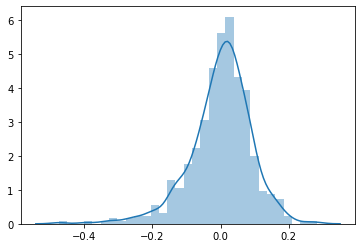

In [54]:
sns.distplot(residual)

## Step 5: Predictions and Evaluation on the test set

In [55]:
num_vars = ['temp', 'hum', 'windspeed','cnt']
df_test[num_vars]=scaler.transform(df_test[num_vars])

In [56]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
248,0,0,1,0.608667,0.880915,0.767112,0.309250,0,0,0,...,0,1,0,0,0,1,0,0,1,0
298,0,0,1,0.537996,0.649072,0.301190,0.445467,0,0,1,...,1,0,0,0,0,0,0,0,0,1
159,0,0,1,0.948314,0.437354,0.304151,0.447883,0,1,0,...,0,0,0,1,0,0,0,0,0,1
660,1,0,1,0.613942,0.539443,0.172135,0.856420,0,0,1,...,1,0,0,0,0,1,0,0,0,0
511,1,0,0,0.798532,0.616589,0.459906,0.755752,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [57]:
y_test = df_test.pop('cnt')
x_test = df_test

In [58]:
x_test_sm = sm.add_constant(x_test)
x_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,...,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
248,1.0,0,0,1,0.608667,0.880915,0.767112,0,0,0,...,0,1,0,0,0,1,0,0,1,0
298,1.0,0,0,1,0.537996,0.649072,0.301190,0,0,1,...,1,0,0,0,0,0,0,0,0,1
159,1.0,0,0,1,0.948314,0.437354,0.304151,0,1,0,...,0,0,0,1,0,0,0,0,0,1
660,1.0,1,0,1,0.613942,0.539443,0.172135,0,0,1,...,1,0,0,0,0,1,0,0,0,0
511,1.0,1,0,0,0.798532,0.616589,0.459906,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [59]:
Dropped_vars = ['Sat','Jun','Aug','Feb','holiday','Nov','Sun','Dec','Thu','Jan','Tue','Wed','summer','hum']

In [60]:
x_test_sm = x_test_sm.drop(Dropped_vars, axis = 1)

In [61]:
y_test_pred = lr_model.predict(x_test_sm)

In [62]:
#evaluate
r2_score(y_true= y_test,y_pred=y_test_pred)

0.8467934757990785

In [63]:
# R squared value for final training set is 0.826
# Adj R squared is 0.821
# and r2_score gives 0.846 value for test set 
# this means the model is successful and is ready to deal with the business goal

## Variable selction using RFE

In [64]:
# Automated Method to somewhat verify and check how computer creates a direct model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [65]:
lm = LinearRegression()
lm.fit(x_train,y_train)
rfe = RFE(lm,14)
rfe = rfe.fit(x_train,y_train)

In [66]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 4),
 ('winter', False, 3),
 ('Aug', False, 13),
 ('Dec', False, 6),
 ('Feb', False, 8),
 ('Jan', False, 5),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', True, 1),
 ('May', True, 1),
 ('Nov', False, 7),
 ('Oct', True, 1),
 ('Sept', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 15),
 ('Sun', False, 12),
 ('Thu', False, 11),
 ('Tue', False, 9),
 ('Wed', False, 10),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1)]

In [67]:
col = x_train.columns[rfe.support_]
x_train_rfe = x_train[col]
x_train_rfe_sm = sm.add_constant(x_train_rfe)
lmr = sm.OLS(y_train, x_train_rfe_sm)
lmr_model = lmr.fit()
lmr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     173.1
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          2.30e-180
Time:                        22:58:39   Log-Likelihood:                 504.07
No. Observations:                 510   AIC:                            -978.1
Df Residuals:                     495   BIC:                            -914.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3465      0.025     14.134      0.000       0.298       0.395
yr                0.2360      0.008     28.612      0.000       0.220       0.252
holiday          -0.0652      0.023     -2.787      0.006      -0.111      -0.019
temp              0.4057      0.026     15.369      0.000       0.354       0.458
hum              -0.1444      0.031     -4.720      0.000      -0.205      -0.084
windspeed        -0.1610      0.023     -6.859      0.000      -0.207      -0.115
spring           -0.1366      0.013    -10.486      0.000      -0.162      -0.111
Jul              -0.0464      0.017     -2.779      0.006      -0.079      -0.014
Mar               0.0594      0.017      3.592      0.000       0.027       0.092
May               0.0388      0.015      2.566      0.011       0.009       0.068
Oct               0.0819      0.016      5.173      0.000       0.051       0.113
Sept              0.0809      0.016      5.128      0.000       0.050       0.112
Mon               0.0389      0.012      3.161      0.002       0.015       0.063
Light Snow       -0.2181      0.028     -7.815      0.000      -0.273      -0.163
Mist + Cloudy    -0.0367      0.011     -3.306      0.001      -0.058      -0.015
==============================================================================
Omnibus:                       95.302   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.714
Skew:                          -0.973   Prob(JB):                     1.95e-48
Kurtosis:                       5.560   Cond. No.                         15.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
vif(x_train_rfe)

,features,vif
3,hum,11.54
2,temp,11.21
4,windspeed,4.70
13,Mist + Cloudy,2.32
0,yr,1.96
5,spring,1.85
6,Jul,1.58
12,Light Snow,1.40
10,Sept,1.30
8,May,1.28


## Manual R squared value for 14 variables is 0.830
## Automated R squared value for 14 variable is 0.826 

This values are very similar and shows our model is ready for business goal to achieve

In [69]:
# for 10 variables
lm = LinearRegression()
lm.fit(x_train,y_train)
rfe = RFE(lm,10)
rfe = rfe.fit(x_train,y_train)

In [70]:
col = x_train.columns[rfe.support_]
x_train_rfe = x_train[col]
x_train_rfe_sm = sm.add_constant(x_train_rfe)
lmr = sm.OLS(y_train, x_train_rfe_sm)
lmr_model = lmr.fit()
lmr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     222.5
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          9.31e-177
Time:                        22:58:39   Log-Likelihood:                 484.47
No. Observations:                 510   AIC:                            -946.9
Df Residuals:                     499   BIC:                            -900.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3800      0.024     15.613      0.000       0.332       0.428
yr             0.2317      0.008     27.336      0.000       0.215       0.248
holiday       -0.0707      0.024     -2.931      0.004      -0.118      -0.023
temp           0.3870      0.024     16.313      0.000       0.340       0.434
hum           -0.1933      0.025     -7.790      0.000      -0.242      -0.145
windspeed     -0.1655      0.024     -6.960      0.000      -0.212      -0.119
spring        -0.1461      0.013    -10.960      0.000      -0.172      -0.120
Mar            0.0602      0.017      3.536      0.000       0.027       0.094
Oct            0.0807      0.016      5.019      0.000       0.049       0.112
Sept           0.0853      0.016      5.482      0.000       0.055       0.116
Light Snow    -0.1901      0.026     -7.240      0.000      -0.242      -0.139
==============================================================================
Omnibus:                       84.339   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.703
Skew:                          -0.895   Prob(JB):                     5.77e-40
Kurtosis:                       5.303   Cond. No.                         12.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# for top 3 variables
lm = LinearRegression()
lm.fit(x_train,y_train)
rfe = RFE(lm,3)
rfe = rfe.fit(x_train,y_train)

In [72]:
col = x_train.columns[rfe.support_]
x_train_rfe = x_train[col]
x_train_rfe_sm = sm.add_constant(x_train_rfe)
lmr = sm.OLS(y_train, x_train_rfe_sm)
lmr_model = lmr.fit()
lmr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     411.3
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          2.99e-135
Time:                        22:58:39   Log-Likelihood:                 366.62
No. Observations:                 510   AIC:                            -725.2
Df Residuals:                     506   BIC:                            -708.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0994      0.015      6.578      0.000       0.070       0.129
yr             0.2372      0.011     22.564      0.000       0.217       0.258
temp           0.5556      0.023     23.944      0.000       0.510       0.601
Light Snow    -0.2445      0.030     -8.087      0.000      -0.304      -0.185
==============================================================================
Omnibus:                        8.236   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.231
Skew:                          -0.309   Prob(JB):                       0.0163
Kurtosis:                       3.075   Cond. No.                         7.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 7),
 ('workingday', False, 13),
 ('temp', True, 1),
 ('hum', False, 3),
 ('windspeed', False, 2),
 ('spring', False, 4),
 ('summer', False, 15),
 ('winter', False, 14),
 ('Aug', False, 24),
 ('Dec', False, 17),
 ('Feb', False, 19),
 ('Jan', False, 16),
 ('Jul', False, 9),
 ('Jun', False, 25),
 ('Mar', False, 8),
 ('May', False, 11),
 ('Nov', False, 18),
 ('Oct', False, 6),
 ('Sept', False, 5),
 ('Mon', False, 10),
 ('Sat', False, 26),
 ('Sun', False, 23),
 ('Thu', False, 22),
 ('Tue', False, 20),
 ('Wed', False, 21),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', False, 12)]

In [74]:
col = x_train.columns[rfe.support_]

In [75]:
col

Index(['yr', 'temp', 'Light Snow'], dtype='object')

## This are Top3 variables contributing significantly towards explaining the demand of the shared bikes